# Phase 1 - Week 1 - Day 1 PM - Machine Learning Problem Framing - Training

In [ ]:
#! pip install streamlit

In [1]:
! pip install plotly

# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Fahmi Iman

Batch : FTDS-001-RMT

Dataset : Rating dan atribut pemain FIFA 2022 yang diambil dari web [Sofifa.com](https://sofifa.com/?r=220069&set=true)

Objective :

Menurut laporan [FIFA 2022](https://publications.fifa.com/en/annual-report-2021/around-fifa/professional-football-2021/), jumlah pemain sepakbola pada tahun 2021 kurang lebih sebanyak 130.000 pemain. Namun, dalam dataset yang digunakan pada kali ini, hanya mencakup 20.000 pemain saja.

Project kali ini bertujuan untuk memprediksi rating pemain FIFA 2022 sehingga semua pemain sepak bola profesional dapat diketahui ratingnya dan tidak menutup kemungkinan untuk lahirnya talenta/wonderkid baru.

Project ini akan dibuat menggunakan algoritma Linear Regresison dan akan dievaluasi dengan menggunakan metrics MAE (Mean Absolute Error).

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [2]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

> *Dalam notebook ini, akan terdapat beberapa Python library yang dilakukan import ke dalam beberapa cell berbeda. Hal ini bertujuan untuk membantu student dalam memahami asal-usul dari module yang digunakan dari suatu Python library.*
>
> *Namun, saat mengerjakan tugas atau real-life projects, student harus menempatkan semua daftar Python library ke dalam satu cell dibagian atas notebook/file Python agar terlebih diketahui library apa saja yang perlu dipersiapkan sebelum notebook/code dijalankan.*

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Load Dataset

data = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/refs/heads/v2.3/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')
data

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [4]:
# Check for Duplicate Data

data.duplicated().sum()

104

In [5]:
# delete duplicate data

data.drop_duplicates(inplace=True)
data

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [6]:
# Backup dataset

data_backup = data.copy()

In [7]:
# Rename columns (optional)

data.rename(columns={'ValueEUR': 'Price', 'Overall': 'Rating'}, inplace=True)
data

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [8]:
# Check dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19156 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19156 non-null  object
 1   Age                19156 non-null  int64 
 2   Height             19156 non-null  int64 
 3   Weight             19156 non-null  int64 
 4   Price              19156 non-null  int64 
 5   AttackingWorkRate  19156 non-null  object
 6   DefensiveWorkRate  19156 non-null  object
 7   PaceTotal          19156 non-null  int64 
 8   ShootingTotal      19156 non-null  int64 
 9   PassingTotal       19156 non-null  int64 
 10  DribblingTotal     19156 non-null  int64 
 11  DefendingTotal     19156 non-null  int64 
 12  PhysicalityTotal   19156 non-null  int64 
 13  Rating             19156 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.2+ MB


- Pada dataset ini terdapat 14 kolom, dimana masing-masing data terdiri dari 3 kolom bertipe object dan 11 kolom bertipe integer.
- Tidak terlihat adanya missing value dari data entries pada masing-masing kolom.

In [9]:
# Check dataset - 2

data.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19156.000000,19156.000000,19156.000000,1.915600e+04,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000,19156.000000
mean,25.190750,181.304865,74.953226,2.825776e+06,67.873095,53.499478,57.805857,62.978545,50.012842,64.644968,65.765765
std,4.743117,6.865032,7.068063,7.609954e+06,10.654588,13.806390,9.828530,9.691676,16.367141,9.626229,6.802014
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.000000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,51.000000,58.000000,35.000000,58.000000,61.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.000000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,64.000000,69.000000,63.000000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000


- Pada dataset ini, `Age` pemain berkisar 16 - 54 tahun dengan rata-rata `Age` sekitar 25 tahun.

- Terlihat dari informasi diatas bahwa rata-rata `Height` berada di angka 181 cm. Tinggi rata-rata orang Asia umumnya berkisar 170-175 cm sehingga dapat diambil hipotesa bahwa pada dataset ini didominasi oleh pemain yang bukan berasal dari Asia.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Akan dilihat perseberan rating pada dataset ini untuk melihat distribusi target (`Rating`) dan juga akan dilihat proporsi tinggi badan (`Height`) dan berat badan (`Weight`) pemain untuk melihat apakah pemain memiliki profil yang ideal atau tidak.

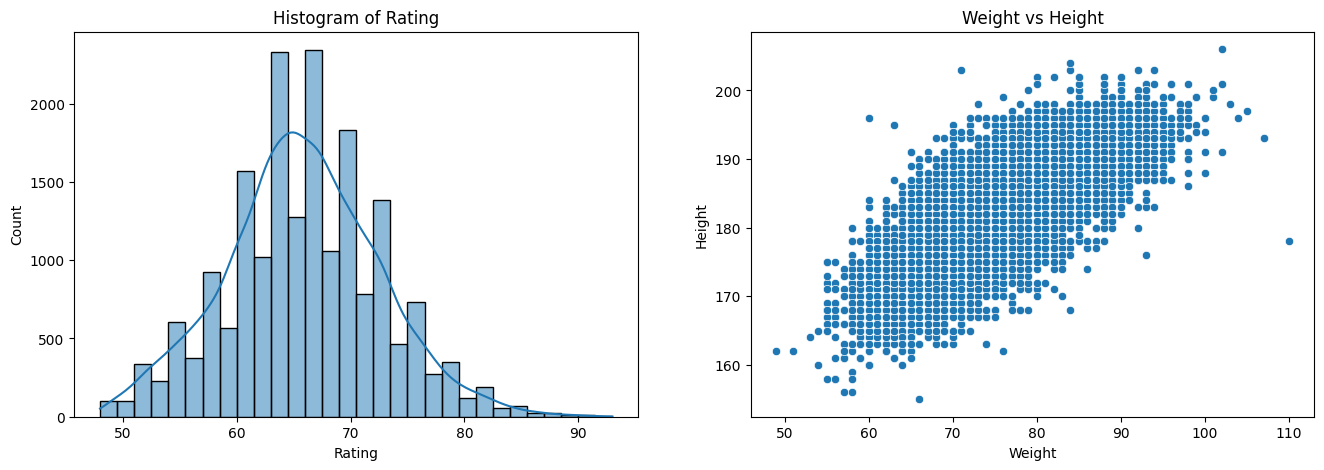

In [10]:
# Create Histogram and Scatter Plot for exploration

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Rating'], kde=True, bins=30)
plt.title('Histogram of Rating')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Weight', y='Height', data=data)
plt.title('Weight vs Height')
plt.show()

Terlihat dari Histogram Plot diatas bahwa `Rating` memiliki distribusi normal dengan mayoritas data berada pada rentang `60` hingga `70`.

`Height` dan `Weight` mempunyai relasi yang searah. Artinya, semakin besar nilai `Height` maka nilai `Weight` juga akan semakin besar. Dapat disimpulkan bahwa mayoritas pemain sepak bola pada dataset ini memiliki kondisi tubuh yang proporsional.

# 5 - Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Split between `X` (Features) and `y` (Target)

In [11]:
# Splitting between `X` and `y`

X = data.drop(['Rating'], axis=1)
y = data['Rating']
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


## Split between Train-Set and Test-Set

In [12]:
# Splitting between Train-Set and Test-Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
X_train

Train Size :  (15324, 13)
Test Size :  (3832, 13)


,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
14145,D. O'Connor,21,189,86,825000,Medium,High,64,28,45,36,64,66
15132,I. Gruev,21,185,76,775000,Medium,Medium,54,48,61,59,57,57
18277,W. Rivera,17,167,67,250000,High,Medium,76,42,47,56,25,41
16680,B. Willumsson,20,185,72,500000,Medium,Medium,62,57,52,60,38,61
2797,A. Mosquera,31,182,80,2100000,High,High,73,42,57,54,74,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633,Sergio Camello,20,177,69,2100000,Medium,Medium,70,67,53,68,24,49
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13806,D. Devoy,19,177,66,1000000,High,Medium,63,51,61,66,47,58
2295,Mauro Júnior,22,171,62,7000000,High,High,84,65,72,78,49,50


## Handle Outlier

**<font color='red'>Akan dijelaskan pada lecture `Feature Engineering`.</font>**

## Handle Missing Values

**<font color='red'>Akan dijelaskan pada lecture `Feature Engineering`.</font>**

In [13]:
# Check missing values on `X_train`

X_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [14]:
# Check missing values on `X_test`

X_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [15]:
# Check missing values on `y_train`

y_train.isnull().sum()

0

In [16]:
# Check missing values on `y_test`

y_test.isnull().sum()

0

## Feature Selection

In [17]:
# Display X_train

X_train

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
14145,D. O'Connor,21,189,86,825000,Medium,High,64,28,45,36,64,66
15132,I. Gruev,21,185,76,775000,Medium,Medium,54,48,61,59,57,57
18277,W. Rivera,17,167,67,250000,High,Medium,76,42,47,56,25,41
16680,B. Willumsson,20,185,72,500000,Medium,Medium,62,57,52,60,38,61
2797,A. Mosquera,31,182,80,2100000,High,High,73,42,57,54,74,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633,Sergio Camello,20,177,69,2100000,Medium,Medium,70,67,53,68,24,49
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13806,D. Devoy,19,177,66,1000000,High,Medium,63,51,61,66,47,58
2295,Mauro Júnior,22,171,62,7000000,High,High,84,65,72,78,49,50


Berdasarkan Personal Judgement, tidak ada kaitannya antara column `Name` dengan column `Rating`. Hal ini dibuktikan dengan nama `Fahmi Ronaldo` tidak ada kaitannya dengan nama sehebat `Cristiano Ronaldo` sehingga ratingnya pun akan berbeda.

In [18]:
# Drop column `Name`

X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis=1, inplace=True)
X_train

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
14145,21,189,86,825000,Medium,High,64,28,45,36,64,66
15132,21,185,76,775000,Medium,Medium,54,48,61,59,57,57
18277,17,167,67,250000,High,Medium,76,42,47,56,25,41
16680,20,185,72,500000,Medium,Medium,62,57,52,60,38,61
2797,31,182,80,2100000,High,High,73,42,57,54,74,75
...,...,...,...,...,...,...,...,...,...,...,...,...
9633,20,177,69,2100000,Medium,Medium,70,67,53,68,24,49
406,25,174,72,28000000,High,Low,86,75,73,86,32,62
13806,19,177,66,1000000,High,Medium,63,51,61,66,47,58
2295,22,171,62,7000000,High,High,84,65,72,78,49,50


**<font color='red'>Feature Selection juga dapat ditambahkan dengan uji statistik antara features dengan target.</font>**

## Split between Numeric Columns and Category Columns

In [19]:
# Get numeric columns and category columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Cat Columns :  ['AttackingWorkRate', 'DefensiveWorkRate']


In [20]:
# Split train-set and test-set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
14145,21,189,86,825000,64,28,45,36,64,66
15132,21,185,76,775000,54,48,61,59,57,57
18277,17,167,67,250000,76,42,47,56,25,41
16680,20,185,72,500000,62,57,52,60,38,61
2797,31,182,80,2100000,73,42,57,54,74,75
...,...,...,...,...,...,...,...,...,...,...
9633,20,177,69,2100000,70,67,53,68,24,49
406,25,174,72,28000000,86,75,73,86,32,62
13806,19,177,66,1000000,63,51,61,66,47,58
2295,22,171,62,7000000,84,65,72,78,49,50


## Feature Scaling

In [21]:
# Display `X_train`

X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
14145,21,189,86,825000,64,28,45,36,64,66
15132,21,185,76,775000,54,48,61,59,57,57
18277,17,167,67,250000,76,42,47,56,25,41
16680,20,185,72,500000,62,57,52,60,38,61
2797,31,182,80,2100000,73,42,57,54,74,75
...,...,...,...,...,...,...,...,...,...,...
9633,20,177,69,2100000,70,67,53,68,24,49
406,25,174,72,28000000,86,75,73,86,32,62
13806,19,177,66,1000000,63,51,61,66,47,58
2295,22,171,62,7000000,84,65,72,78,49,50


Akan dilakukan Feature Scaling menggunakan `MinMaxScaler` karena mudah untuk dijelaskan ke user.

**<font color='red'>Penjelasan lebih detail mengenai Feature Scaling akan dijelaskan pada lecture `Feature Engineering`</font>**

In [22]:
# Feature Scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.13157895, 0.66666667, 0.60655738, ..., 0.15151515, 0.64935065,
        0.58730159],
       [0.13157895, 0.58823529, 0.44262295, ..., 0.5       , 0.55844156,
        0.44444444],
       [0.02631579, 0.23529412, 0.29508197, ..., 0.45454545, 0.14285714,
        0.19047619],
       ...,
       [0.07894737, 0.43137255, 0.27868852, ..., 0.60606061, 0.42857143,
        0.46031746],
       [0.15789474, 0.31372549, 0.21311475, ..., 0.78787879, 0.45454545,
        0.33333333],
       [0.26315789, 0.29411765, 0.39344262, ..., 0.63636364, 0.58441558,
        0.49206349]])

## Feature Encoding

In [23]:
# Display `X_train_cat`

X_train_cat

,AttackingWorkRate,DefensiveWorkRate
14145,Medium,High
15132,Medium,Medium
18277,High,Medium
16680,Medium,Medium
2797,High,High
...,...,...
9633,Medium,Medium
406,High,Low
13806,High,Medium
2295,High,High


Akan dilakukan Feature Encoding menggunakan `OrdinalEncoder`. Hal ini dikarenakan categorical column memiliki tingkatan pada nilainya.

**<font color='red'>Penjelasan lebih detail mengenai Feature Encoding akan dijelaskan pada lecture `Feature Engineering`</font>**

In [24]:
# Feature Encoding using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High'],
                                     ['Low', 'Medium', 'High']])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[1., 2.],
       [1., 1.],
       [2., 1.],
       ...,
       [2., 1.],
       [2., 2.],
       [2., 0.]])

## Concate between Numeric Columns and Category Columns

In [25]:
# Concate columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.13157895, 0.66666667, 0.60655738, ..., 0.58730159, 1.        ,
        2.        ],
       [0.13157895, 0.58823529, 0.44262295, ..., 0.44444444, 1.        ,
        1.        ],
       [0.02631579, 0.23529412, 0.29508197, ..., 0.19047619, 2.        ,
        1.        ],
       ...,
       [0.07894737, 0.43137255, 0.27868852, ..., 0.46031746, 2.        ,
        1.        ],
       [0.15789474, 0.31372549, 0.21311475, ..., 0.33333333, 2.        ,
        2.        ],
       [0.26315789, 0.29411765, 0.39344262, ..., 0.49206349, 2.        ,
        0.        ]])

In [26]:
# Create Pandas DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.131579,0.666667,0.606557,0.004253,0.521739,0.131579,0.294118,0.151515,0.649351,0.587302,1.0,2.0
1,0.131579,0.588235,0.442623,0.003995,0.376812,0.394737,0.529412,0.500000,0.558442,0.444444,1.0,1.0
2,0.026316,0.235294,0.295082,0.001289,0.695652,0.315789,0.323529,0.454545,0.142857,0.190476,2.0,1.0
3,0.105263,0.588235,0.377049,0.002577,0.492754,0.513158,0.397059,0.515152,0.311688,0.507937,1.0,1.0
4,0.394737,0.529412,0.508197,0.010825,0.652174,0.315789,0.470588,0.424242,0.779221,0.730159,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15319,0.105263,0.431373,0.327869,0.010825,0.608696,0.644737,0.411765,0.636364,0.129870,0.317460,1.0,1.0
15320,0.236842,0.372549,0.377049,0.144330,0.840580,0.750000,0.705882,0.909091,0.233766,0.523810,2.0,0.0
15321,0.078947,0.431373,0.278689,0.005155,0.507246,0.434211,0.529412,0.606061,0.428571,0.460317,2.0,1.0
15322,0.157895,0.313725,0.213115,0.036082,0.811594,0.618421,0.691176,0.787879,0.454545,0.333333,2.0,2.0


# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

**<font color='blue'>Berikan penjelasan mengenai :</font>**

**<font color='blue'> 1. <font color='blue'>`Algoritma yang dipakai.`</font>**
    
    Contoh :
    ```
    Algoritma yang dipakai adalah Linear Regression. Hal ini dikarenakan algoritma ini mudah untuk diinterpretasikan dan
    memiliki kemampuan yang cukup baik dalam kasus regresi.
    ```

**<font color='blue'> 2. `Teknik evaluasi (metrics) yang dipakai.`</font>**
    
    Contoh :
    ```
    Metrics yang akan dipakai adalah Mean Absolute Error (MAE). Metrics ini melakukan kalkulasi nilai error/kesalahan
    dari masing-masing data lalu dicari nilai rata-rata errornya. Nilai rata-rata error ini mudah untuk diinterpretasikan.
    ```

In [27]:
# Training using Linear Regression

from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [28]:
# Train the model

model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [29]:
# Predict train-set and test-set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([56.5102241 , 62.02465181, 52.79707352, ..., 62.70492037,
       67.88197356, 67.46260705])

In [30]:
# Create Pandas DataFrame of Rating's Prediction

pd.DataFrame(data={
    'y_train': y_train.tolist(),
    'y_pred_train': y_pred_train.tolist()})

,y_train,y_pred_train
0,62,56.510224
1,61,62.024652
2,54,52.797074
3,58,61.190025
4,73,67.837918
...,...,...
15319,66,60.519921
15320,80,77.616443
15321,62,62.704920
15322,74,67.881974


In [31]:
# Model evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set : ', mean_absolute_error(y_test, y_pred_test))

Error - Train Set :  2.3366413026819495
Error - Test Set :  2.384766995144789


**<font color='blue'>Analisa : </font>**

**<font color='blue'>1. Lakukan analisa apakah model tergolong overfit, underfit, atau good-fit ! </font>**

**<font color='blue'>2. Kelebihan dan kelemahan model dalam hal teknis dan keterkaitannya dengan domain bisnis yang dihadapi! </font>**

**<font color='blue'>3. Temukan hal yang unik ! </font>**

# 9 - Model Saving

> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [32]:
# Save the Files

import pickle
import json

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

# 10 - Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

**<font color='blue'>Berikan kesimpulan mengenai : </font>**

**<font color='blue'>1. EDA</font>**

**<font color='blue'>2. Model Analysis</font>**

**<font color='blue'>3. Further Improvement</font>**

**<font color='blue'>4. Hal lain</font>**

In [33]:
# Get Intercept and Slope

print('Intercept : ', model_lin_reg.intercept_)
print('Slope : ', model_lin_reg.coef_)

Intercept :  36.205325036674935
Slope :  [ 7.53628777  1.7363012   1.24376746 38.93496911  3.25268229  2.89569283
  2.39225843 20.21048741  8.16450617 12.68558755 -0.31512014 -0.52243973]


In [34]:
# List all columns

X_train_final_df.columns.tolist()

[('Age',),
 ('Height',),
 ('Weight',),
 ('Price',),
 ('PaceTotal',),
 ('ShootingTotal',),
 ('PassingTotal',),
 ('DribblingTotal',),
 ('DefendingTotal',),
 ('PhysicalityTotal',),
 ('AttackingWorkRate',),
 ('DefensiveWorkRate',)]

In [35]:
# Concate between slopes and features

values = list(model_lin_reg.coef_) + [model_lin_reg.intercept_]
feature_names = num_columns + cat_columns + ['Intercept']
df_coef_intercept = pd.DataFrame([values], columns=feature_names)
df_coef_intercept

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate,Intercept
0,7.536288,1.736301,1.243767,38.934969,3.252682,2.895693,2.392258,20.210487,8.164506,12.685588,-0.31512,-0.52244,36.205325
